
_____________________________________________________________________________

 Testing graph with 3 nodes and 3 colors
[(0, 1), (0, 2), (1, 2)]
Grover iterations: 2
depth: 72
width: 13
 -> depth * width: 936
Simulating circuit locally
Number of solutions(cpu): 6 / 64
Optimal grover iterations number: 2.565099660323728
Random guess chance of being correct: 0.09375
Chance of getting a correct result: 0.2412109375
Average "probability" of individual correct outcomes: 0.040201822916666664
Average "probability" of individual incorrect outcomes: 0.013082570043103448


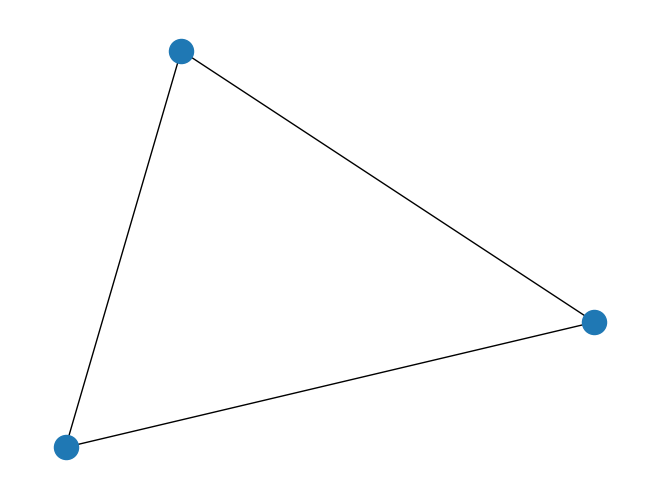

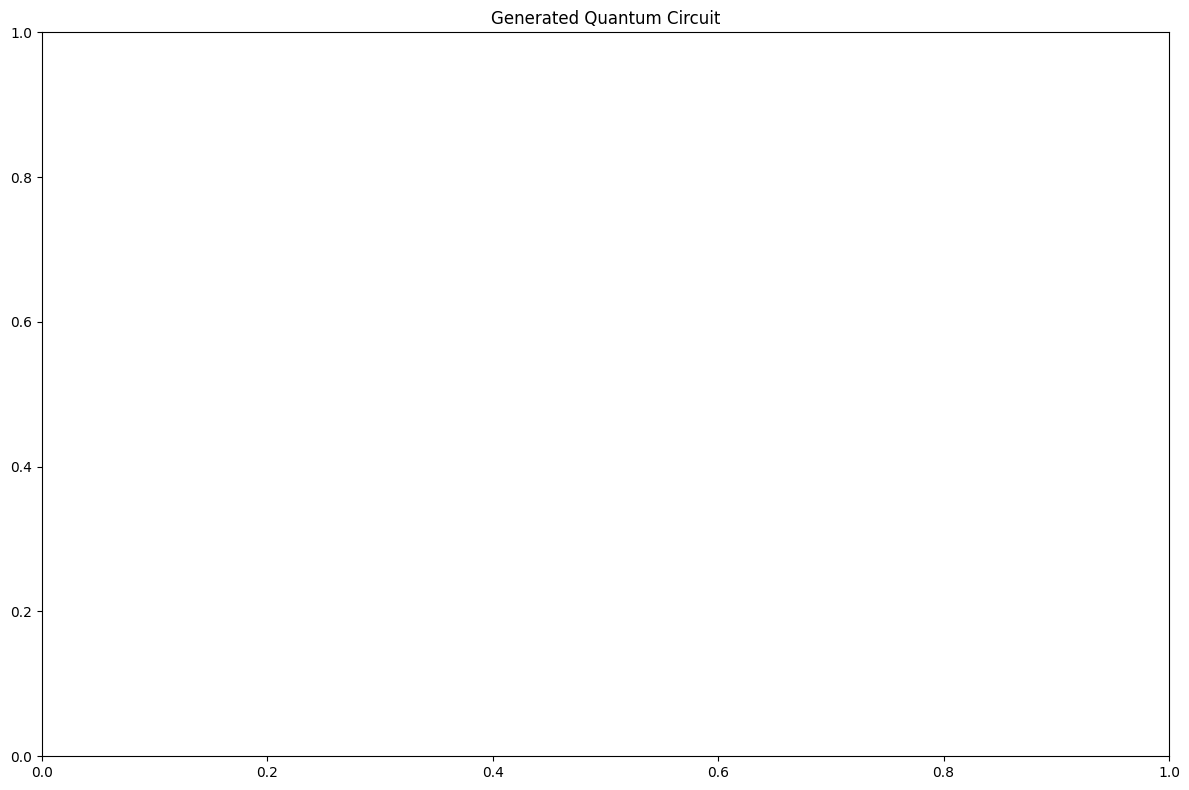

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from main import main

# Assuming main returns a dictionary including measurement results
# with keys like "counts" (dict of bitstrings to counts), "probabilities" (dict of bitstrings to probs)
# and also CPU valid solutions for comparison.

def plot_graph(G, title="Graph"):
    plt.figure(figsize=(4,4))
    nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=800)
    plt.title(title)
    plt.show()

def test_graph(G, k):
    print(f"\n_____________________________________________________________________________\n\n Testing graph with {len(G.nodes())} nodes and {k} colors")
    #plot_graph(G, title=f"Test Graph with {k} colors")
    
    data = main(k=k, graph=G, system="simple")

    

# Now test some graphs:
triangle = nx.complete_graph(3)
square = nx.cycle_graph(4)
bipartite = nx.complete_bipartite_graph(2, 3)
single_node = nx.empty_graph(1)

# Run tests
test_graph(triangle, k = 3)
#test_graph(square, k = 3)
#test_graph(bipartite, k = 3)
#test_graph(single_node, k = 3)


Generating complete graph of 3 colors
[(0, 1), (0, 2), (1, 2)]
Grover iterations: 2
depth: 72
width: 13
 -> depth * width: 936
Simulating circuit locally


Number of solutions(cpu): 6 / 64
Optimal grover iterations number: 2.565099660323728
Random guess chance of being correct: 0.09375
Chance of getting a correct result: 0.9990234375
Average "probability" of individual correct outcomes: 0.16650390625
Average "probability" of individual incorrect outcomes: 1.683728448275862e-05


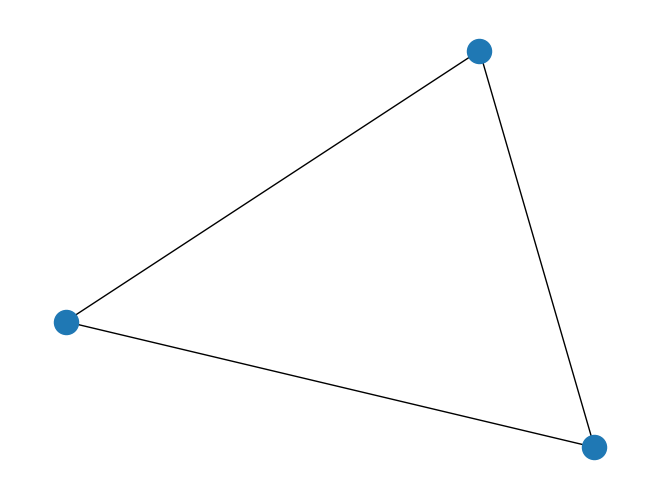

In [6]:

from main import main
# The following line generates and simulates locally a complete graph of three colors for k=3
# using the minimum width approach
r = main(k=3, system="simple")  
# r contains information about the outcome of the generation/execution, most of which
# is already printed by main